In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


# DATA UNDERSTANDING - CLEANING

**invoice_no:** Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation. <br>
**customer_id:** Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation. <br>
**gender:** String variable of the customer's gender. <br>
**age:** Positive Integer variable of the customers age. <br>
**category:** String variable of the category of the purchased product. <br>
**quantity:** The quantities of each product (item) per transaction. Numeric. <br>
**price:** Unit price. Numeric. Product price per unit in Turkish Liras (TL). <br>
**payment_method:** String variable of the payment method (cash, credit card or debit card) used for the transaction. <br>
**invoice_date:** Invoice date. The day when a transaction was generated. <br>
**shopping_mall:** String variable of the name of the shopping mall where the transaction was made.

In [2]:
# read our dataset
df = pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")

In [3]:
# check the first 5 columns to see its structure
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
# check the info for every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


We have 9.9457 entries, 9 different columns and non of them has null values. <br>
Let's move on and learn more about our dataset.

In [5]:
# checking for duplicates in categorical columns
list = ['shopping_mall','gender','category','payment_method']
for i in list:
   print(df[i].unique())

['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']
['Female' 'Male']
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
['Credit Card' 'Debit Card' 'Cash']


We have 10 different shopping malls, 8 different categories, 3 types of payment and 2 gender types. <br> <br> I also use the above code to check if I have any miswrittens. For instance we could have Toy instead of Toys or Metropol AV instead of Metropol AVM. But in this case there are not.

### Change Turkish Liras to Dollars
The price column that we have is in Turkish Liras. I am going to change it to dollars and round our outcome to two decimal. <br>
(Todays exchange rate is 1 TL to 0.031 $.)

In [6]:
df['price_$']=(df['price']*0.031).round(2)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,price_$
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,46.51
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,55.82
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,9.30
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,93.03
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1.88


Now, we have a column with dollars but our outcome is in product price per unit. But as we can see there is a quantity column which inticates that many customers have taken more than one product in their orders. What about the total price for each row? We are making one column with the total price that each customer paid for their order.

In [7]:
# create a column for total price
df['total_price_$']=(df['price_$']*df['quantity']).round(2)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,price_$,total_price_$
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,46.51,232.55
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,55.82,167.46
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,9.30,9.30
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,93.03,465.15
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1.88,7.52


### Seperate day, month, year

In the invoice_date column we have information about the date that every order was made. We are going to split the invoice date into day, month, year columns. This will help us later in our analysis.

In [8]:
# split invoice_date column
df[['day','month','year']] = df['invoice_date'].str.split('/',expand=True)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,price_$,total_price_$,day,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,46.51,232.55,5,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,55.82,167.46,12,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,9.30,9.30,9,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,93.03,465.15,16,05,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1.88,7.52,24,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1.82,9.10,21,09,2022
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,0.32,0.64,22,09,2021
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,0.32,0.64,28,03,2021
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,130.20,520.80,16,03,2021


### Delete year 2023

We have information about three years (2021 to 2023). But as we can see below for year 2023 we only have information about the first tree months. So we are going to exclude them from our analysis. I could keep the data but I am going to compare the outcomes from 2022 and 2021, so they are no use to me.

In [9]:
df_2023 = df.loc[df['year'] == '2023'] 
df_2023

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,price_$,total_price_$,day,month,year
19,I992454,C196845,Male,24,Toys,4,143.36,Cash,7/3/2023,Cevahir AVM,4.44,17.76,7,3,2023
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,15/02/2023,Emaar Square Mall,9.30,9.30,15,02,2023
35,I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,4/1/2023,Emaar Square Mall,0.16,0.16,4,1,2023
46,I267193,C317818,Female,19,Cosmetics,3,121.98,Credit Card,12/1/2023,Mall of Istanbul,3.78,11.34,12,1,2023
51,I202367,C317478,Female,41,Books,3,45.45,Cash,24/02/2023,Istinye Park,1.41,4.23,24,02,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99429,I208840,C219131,Female,58,Toys,1,35.84,Credit Card,18/02/2023,Istinye Park,1.11,1.11,18,02,2023
99441,I203187,C235554,Male,38,Food & Beverage,4,20.92,Cash,2/3/2023,Zorlu Center,0.65,2.60,2,3,2023
99446,I327966,C107209,Female,32,Food & Beverage,1,5.23,Cash,5/2/2023,Metropol AVM,0.16,0.16,5,2,2023
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon,9.30,9.30,1,1,2023


In [10]:
df_2023['month'].unique()

array(['3', '02', '1', '01', '2'], dtype=object)

In [11]:
# delete data for 2023
df.drop(df.loc[df['year']=='2023'].index, inplace=True)
df['year'].unique()

array(['2022', '2021'], dtype=object)

### Fix duplicates in month column

In the month column, some numbers have zero in the beginning and some other not. For instance, we can observe that we have 05 for the May and 8 for August. To have a more uniform type we are going to delete all the zeros that are first in every number in that column.

In [12]:
# delete zero from the beginning of every month
df['month'] = df['month'].str.lstrip('0')
df['month'].unique()

array(['8', '12', '11', '5', '10', '3', '1', '7', '6', '4', '2', '9'],
      dtype=object)

### Delete unnecessary columns

In [13]:
df = df.drop(['price'], axis=1)
df

,invoice_no,customer_id,gender,age,category,quantity,payment_method,invoice_date,shopping_mall,price_$,total_price_$,day,month,year
0,I138884,C241288,Female,28,Clothing,5,Credit Card,5/8/2022,Kanyon,46.51,232.55,5,8,2022
1,I317333,C111565,Male,21,Shoes,3,Debit Card,12/12/2021,Forum Istanbul,55.82,167.46,12,12,2021
2,I127801,C266599,Male,20,Clothing,1,Cash,9/11/2021,Metrocity,9.30,9.30,9,11,2021
3,I173702,C988172,Female,66,Shoes,5,Credit Card,16/05/2021,Metropol AVM,93.03,465.15,16,5,2021
4,I337046,C189076,Female,53,Books,4,Cash,24/10/2021,Kanyon,1.88,7.52,24,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,Credit Card,21/09/2022,Kanyon,1.82,9.10,21,9,2022
99453,I325143,C569580,Male,27,Food & Beverage,2,Cash,22/09/2021,Forum Istanbul,0.32,0.64,22,9,2021
99454,I824010,C103292,Male,63,Food & Beverage,2,Debit Card,28/03/2021,Metrocity,0.32,0.64,28,3,2021
99455,I702964,C800631,Male,56,Technology,4,Cash,16/03/2021,Istinye Park,130.20,520.80,16,3,2021


In [14]:
#save clean dataset to csv file
df.to_csv('shopping_data.csv')

Now that we have a clean dataset we can continue with our data answering a few questions.

# ANSWERING QUESTIONS USING SQL WITH PANDAS / PYTHON CODE

Just for excersice purposes, I am going to use two different methods (with python code and with sql pandas) to answer the same question.

## Q1: Which Month Has The Most Sales?

### 1st METHOD
Let's group our data on each month and then get the sum for the total price.

In [15]:
df[['month', 'total_price_$']].groupby('month').sum().round()

,total_price_$
month,
1,601574.0
10,636889.0
11,564412.0
12,603098.0
2,530601.0
3,602693.0
4,580177.0
5,611288.0
6,586937.0


We can observe that the most profitable month is October. The total profit for all the mall in Istabul is 636.889 $.

### 2nd Method

We will first install the required libraries and then use sql to answer our question.

In [16]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [17]:
#install required library
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [18]:
pysqldf("""select month, round(sum(total_price_$)) as total_price_$
       from df group by month;""")  

,month,total_price_$
0,1,601574.0
1,10,636889.0
2,11,564412.0
3,12,603098.0
4,2,530601.0
5,3,602693.0
6,4,580177.0
7,5,611288.0
8,6,586937.0
9,7,631729.0


## Q2: Which Category is More Profitable for Youth?

Let's say that we want to see how young people spend their money.

### 1st Method

In [19]:
df.query("age >= 18 and age < 30").groupby(["category"])["total_price_$"].sum().round().sort_values(ascending=False).reset_index()

,category,total_price_$
0,Clothing,751802.0
1,Shoes,447526.0
2,Technology,362379.0
3,Cosmetics,42768.0
4,Toys,27063.0
5,Books,5758.0
6,Food & Beverage,5496.0
7,Souvenir,4192.0


### 2nd Method

In [20]:
pysqldf("""select category, round(sum(total_price_$)) as total_price_$
       from df where age >= 18 and age < 30 group by category order by total_price_$ desc;""")  

,category,total_price_$
0,Clothing,751802.0
1,Shoes,447526.0
2,Technology,362379.0
3,Cosmetics,42768.0
4,Toys,27063.0
5,Books,5758.0
6,Food & Beverage,5496.0
7,Souvenir,4192.0


Most people between 18 to 30 spend most of their money in clothing and shoes.

## Q3: Which payment method prefer each gender?

### 1st METHOD

In [21]:
df.groupby(['gender', 'payment_method']).size().sort_values(ascending=False)

gender  payment_method
Female  Cash              24232
        Credit Card       19185
Male    Cash              16389
        Credit Card       12747
Female  Debit Card        10931
Male    Debit Card         7449
dtype: int64

### 2nd METHOD

In [22]:
pysqldf("""select gender, payment_method, count(payment_method) as count
       from df group by gender, payment_method order by count desc;""")  

,gender,payment_method,count
0,Female,Cash,24232
1,Female,Credit Card,19185
2,Male,Cash,16389
3,Male,Credit Card,12747
4,Female,Debit Card,10931
5,Male,Debit Card,7449


It seems that both sexes prefer to pay with cash. Also, we can observe that females are shopping more than males.

## Q4: Which is the total price for every for years 2022 and 2021?

In [23]:
df[['shopping_mall', 'year', 'total_price_$']].groupby(['shopping_mall','year']).sum().round()

total_price_$
shopping_mall     year               
Cevahir AVM       2021       178521.0
                  2022       180783.0
Emaar Square Mall 2021       185421.0
                  2022       168138.0
Forum Istanbul    2021       171915.0
                  2022       179806.0
Istinye Park      2021       345755.0
                  2022       355550.0
Kanyon            2021       718204.0
                  2022       710577.0
Mall of Istanbul  2021       721332.0
                  2022       725709.0
Metrocity         2021       516628.0
                  2022       534573.0
Metropol AVM      2021       365654.0
                  2022       352646.0
Viaport Outlet    2021       172741.0
                  2022       183533.0
Zorlu Center      2021       175149.0
                  2022       187169.0

In [24]:
pysqldf("""select shopping_mall, year, sum(total_price_$) as total_price
       from df group by shopping_mall, year order by shopping_mall, year;""")  

,shopping_mall,year,total_price
0,Cevahir AVM,2021,178520.90
1,Cevahir AVM,2022,180782.72
2,Emaar Square Mall,2021,185421.26
3,Emaar Square Mall,2022,168138.30
4,Forum Istanbul,2021,171915.03
5,Forum Istanbul,2022,179805.69
6,Istinye Park,2021,345755.45
7,Istinye Park,2022,355549.79
8,Kanyon,2021,718204.16
9,Kanyon,2022,710577.02


## Q5: Which Shopping Mall Had Decrease instead of Increase in Total Price For 2022?

### 1st Method
We are going to group our data and keep only total_price_$ column from our dataframe, which is our only essential information to answer our question.

In [25]:
a = df[['shopping_mall', 'year', 'total_price_$']].groupby(['shopping_mall','year']).sum().round()
a.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20 entries, ('Cevahir AVM', '2021') to ('Zorlu Center', '2022')
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_price_$  20 non-null     float64
dtypes: float64(1)
memory usage: 411.0+ bytes


In [26]:
a.index

MultiIndex([(      'Cevahir AVM', '2021'),
            (      'Cevahir AVM', '2022'),
            ('Emaar Square Mall', '2021'),
            ('Emaar Square Mall', '2022'),
            (   'Forum Istanbul', '2021'),
            (   'Forum Istanbul', '2022'),
            (     'Istinye Park', '2021'),
            (     'Istinye Park', '2022'),
            (           'Kanyon', '2021'),
            (           'Kanyon', '2022'),
            ( 'Mall of Istanbul', '2021'),
            ( 'Mall of Istanbul', '2022'),
            (        'Metrocity', '2021'),
            (        'Metrocity', '2022'),
            (     'Metropol AVM', '2021'),
            (     'Metropol AVM', '2022'),
            (   'Viaport Outlet', '2021'),
            (   'Viaport Outlet', '2022'),
            (     'Zorlu Center', '2021'),
            (     'Zorlu Center', '2022')],
           names=['shopping_mall', 'year'])

We have now a multiIndex Dataframe with one column (total_price_$). <br> We can retrieve easily information about each mall for every year or to check both years using the code below.

In [27]:
#retrieve total price about Zorlu Center Mall for 2022
a.loc['Zorlu Center','2022']

total_price_$    187169.0
Name: (Zorlu Center, 2022), dtype: float64

In [28]:
#retrieve total price for both years
a.loc['Zorlu Center',:]

,total_price_$
year,
2021,175149.0
2022,187169.0


But this does not answer our question properly. Let's keep moving to see for every mall, if we had an increase or decrease at the year 2022. We are going to reset our index to have an easier manipulation to our data.

In [29]:
a = a.reset_index()
a.head()

,shopping_mall,year,total_price_$
0,Cevahir AVM,2021,178521.0
1,Cevahir AVM,2022,180783.0
2,Emaar Square Mall,2021,185421.0
3,Emaar Square Mall,2022,168138.0
4,Forum Istanbul,2021,171915.0


In [30]:
a['sales_diff'] = np.where(a['year'] == '2022', a['total_price_$'].diff(periods=1), 0)
a.head()

,shopping_mall,year,total_price_$,sales_diff
0,Cevahir AVM,2021,178521.0,0.0
1,Cevahir AVM,2022,180783.0,2262.0
2,Emaar Square Mall,2021,185421.0,0.0
3,Emaar Square Mall,2022,168138.0,-17283.0
4,Forum Istanbul,2021,171915.0,0.0


In [31]:
a_negative = a[a['sales_diff'] < 0]
a_negative


,shopping_mall,year,total_price_$,sales_diff
3,Emaar Square Mall,2022,168138.0,-17283.0
9,Kanyon,2022,710577.0,-7627.0
15,Metropol AVM,2022,352646.0,-13008.0


### 2nd Method

In [32]:
pysqldf("""select shopping_mall, year, sum(total_price_$) as total_price_$,
              case when year = 2022 
              then sum(total_price_$) - lag(sum(total_price_$), 1) over (order by shopping_mall, year)  
              else 0  end as diff
        from df group by shopping_mall, year order by shopping_mall, year;""")

,shopping_mall,year,total_price_$,diff
0,Cevahir AVM,2021,178520.90,0.00
1,Cevahir AVM,2022,180782.72,2261.82
2,Emaar Square Mall,2021,185421.26,0.00
3,Emaar Square Mall,2022,168138.30,-17282.96
4,Forum Istanbul,2021,171915.03,0.00
5,Forum Istanbul,2022,179805.69,7890.66
6,Istinye Park,2021,345755.45,0.00
7,Istinye Park,2022,355549.79,9794.34
8,Kanyon,2021,718204.16,0.00
9,Kanyon,2022,710577.02,-7627.14


As we can see 3 malls (Emaar Square Mall, Kanyon, Metropol AVM) have a decrease in their total sales for 2022 compared to previous year.

# VISUALIZING OUR DATA

Let's make a quick visual overview of our data.

In [33]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,payment_method,invoice_date,shopping_mall,price_$,total_price_$,day,month,year
0,I138884,C241288,Female,28,Clothing,5,Credit Card,5/8/2022,Kanyon,46.51,232.55,5,8,2022
1,I317333,C111565,Male,21,Shoes,3,Debit Card,12/12/2021,Forum Istanbul,55.82,167.46,12,12,2021
2,I127801,C266599,Male,20,Clothing,1,Cash,9/11/2021,Metrocity,9.30,9.30,9,11,2021
3,I173702,C988172,Female,66,Shoes,5,Credit Card,16/05/2021,Metropol AVM,93.03,465.15,16,5,2021
4,I337046,C189076,Female,53,Books,4,Cash,24/10/2021,Kanyon,1.88,7.52,24,10,2021


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


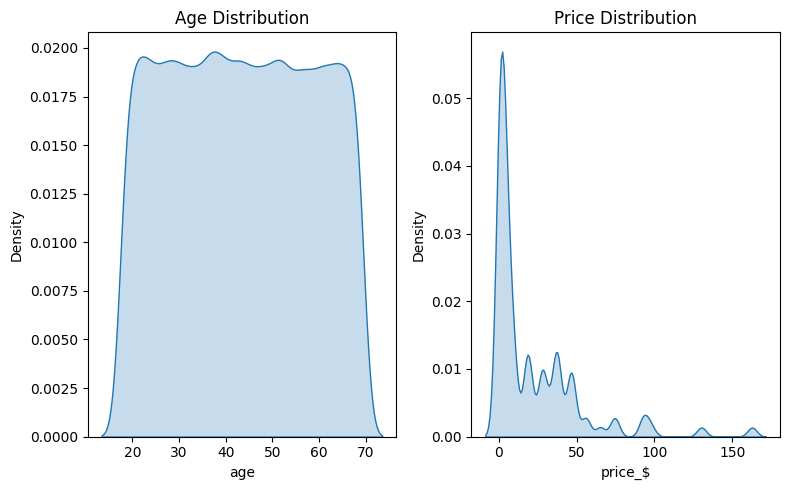

In [34]:
# import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# make two subplots side by side
fig, ax =plt.subplots(1,2,figsize=(8,5))

sns.kdeplot(data=df, x="age",fill=True, ax=ax[0]).set_title(
'Age Distribution')

sns.kdeplot(data=df, x="price_$",fill=True, ax=ax[1]).set_title(
'Price Distribution')

#add space
fig.tight_layout()


We can see that age is between 20 to 70 years old and price for each product varies from 0 to 50. <br>

Now it's time to do what I was delaying until now... CONVERT month, year, day to DATETIME.
I had them as a string columns (as it didn't need to change them, I kept them as strings) but now that I want to visualize my results and I would like to be sorted correctly I should convert them.

In [35]:
# import required library
from datetime import datetime

In [36]:
#convert month, year, day column from string to datetime
df['month']=pd.DatetimeIndex(df['invoice_date']).month
df['year']=pd.DatetimeIndex(df['invoice_date']).year
df['day']=pd.DatetimeIndex(df['invoice_date']).day

/tmp/ipykernel_18/281600782.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = df.groupby(df['shopping_mall']).agg({'total_price_$': sum})
/tmp/ipykernel_18/281600782.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = df.groupby(df['payment_method']).agg({'total_price_$': sum})
/tmp/ipykernel_18/281600782.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = df.groupby(df['day']).agg({'total_price_$': sum})
/tmp/ipyke

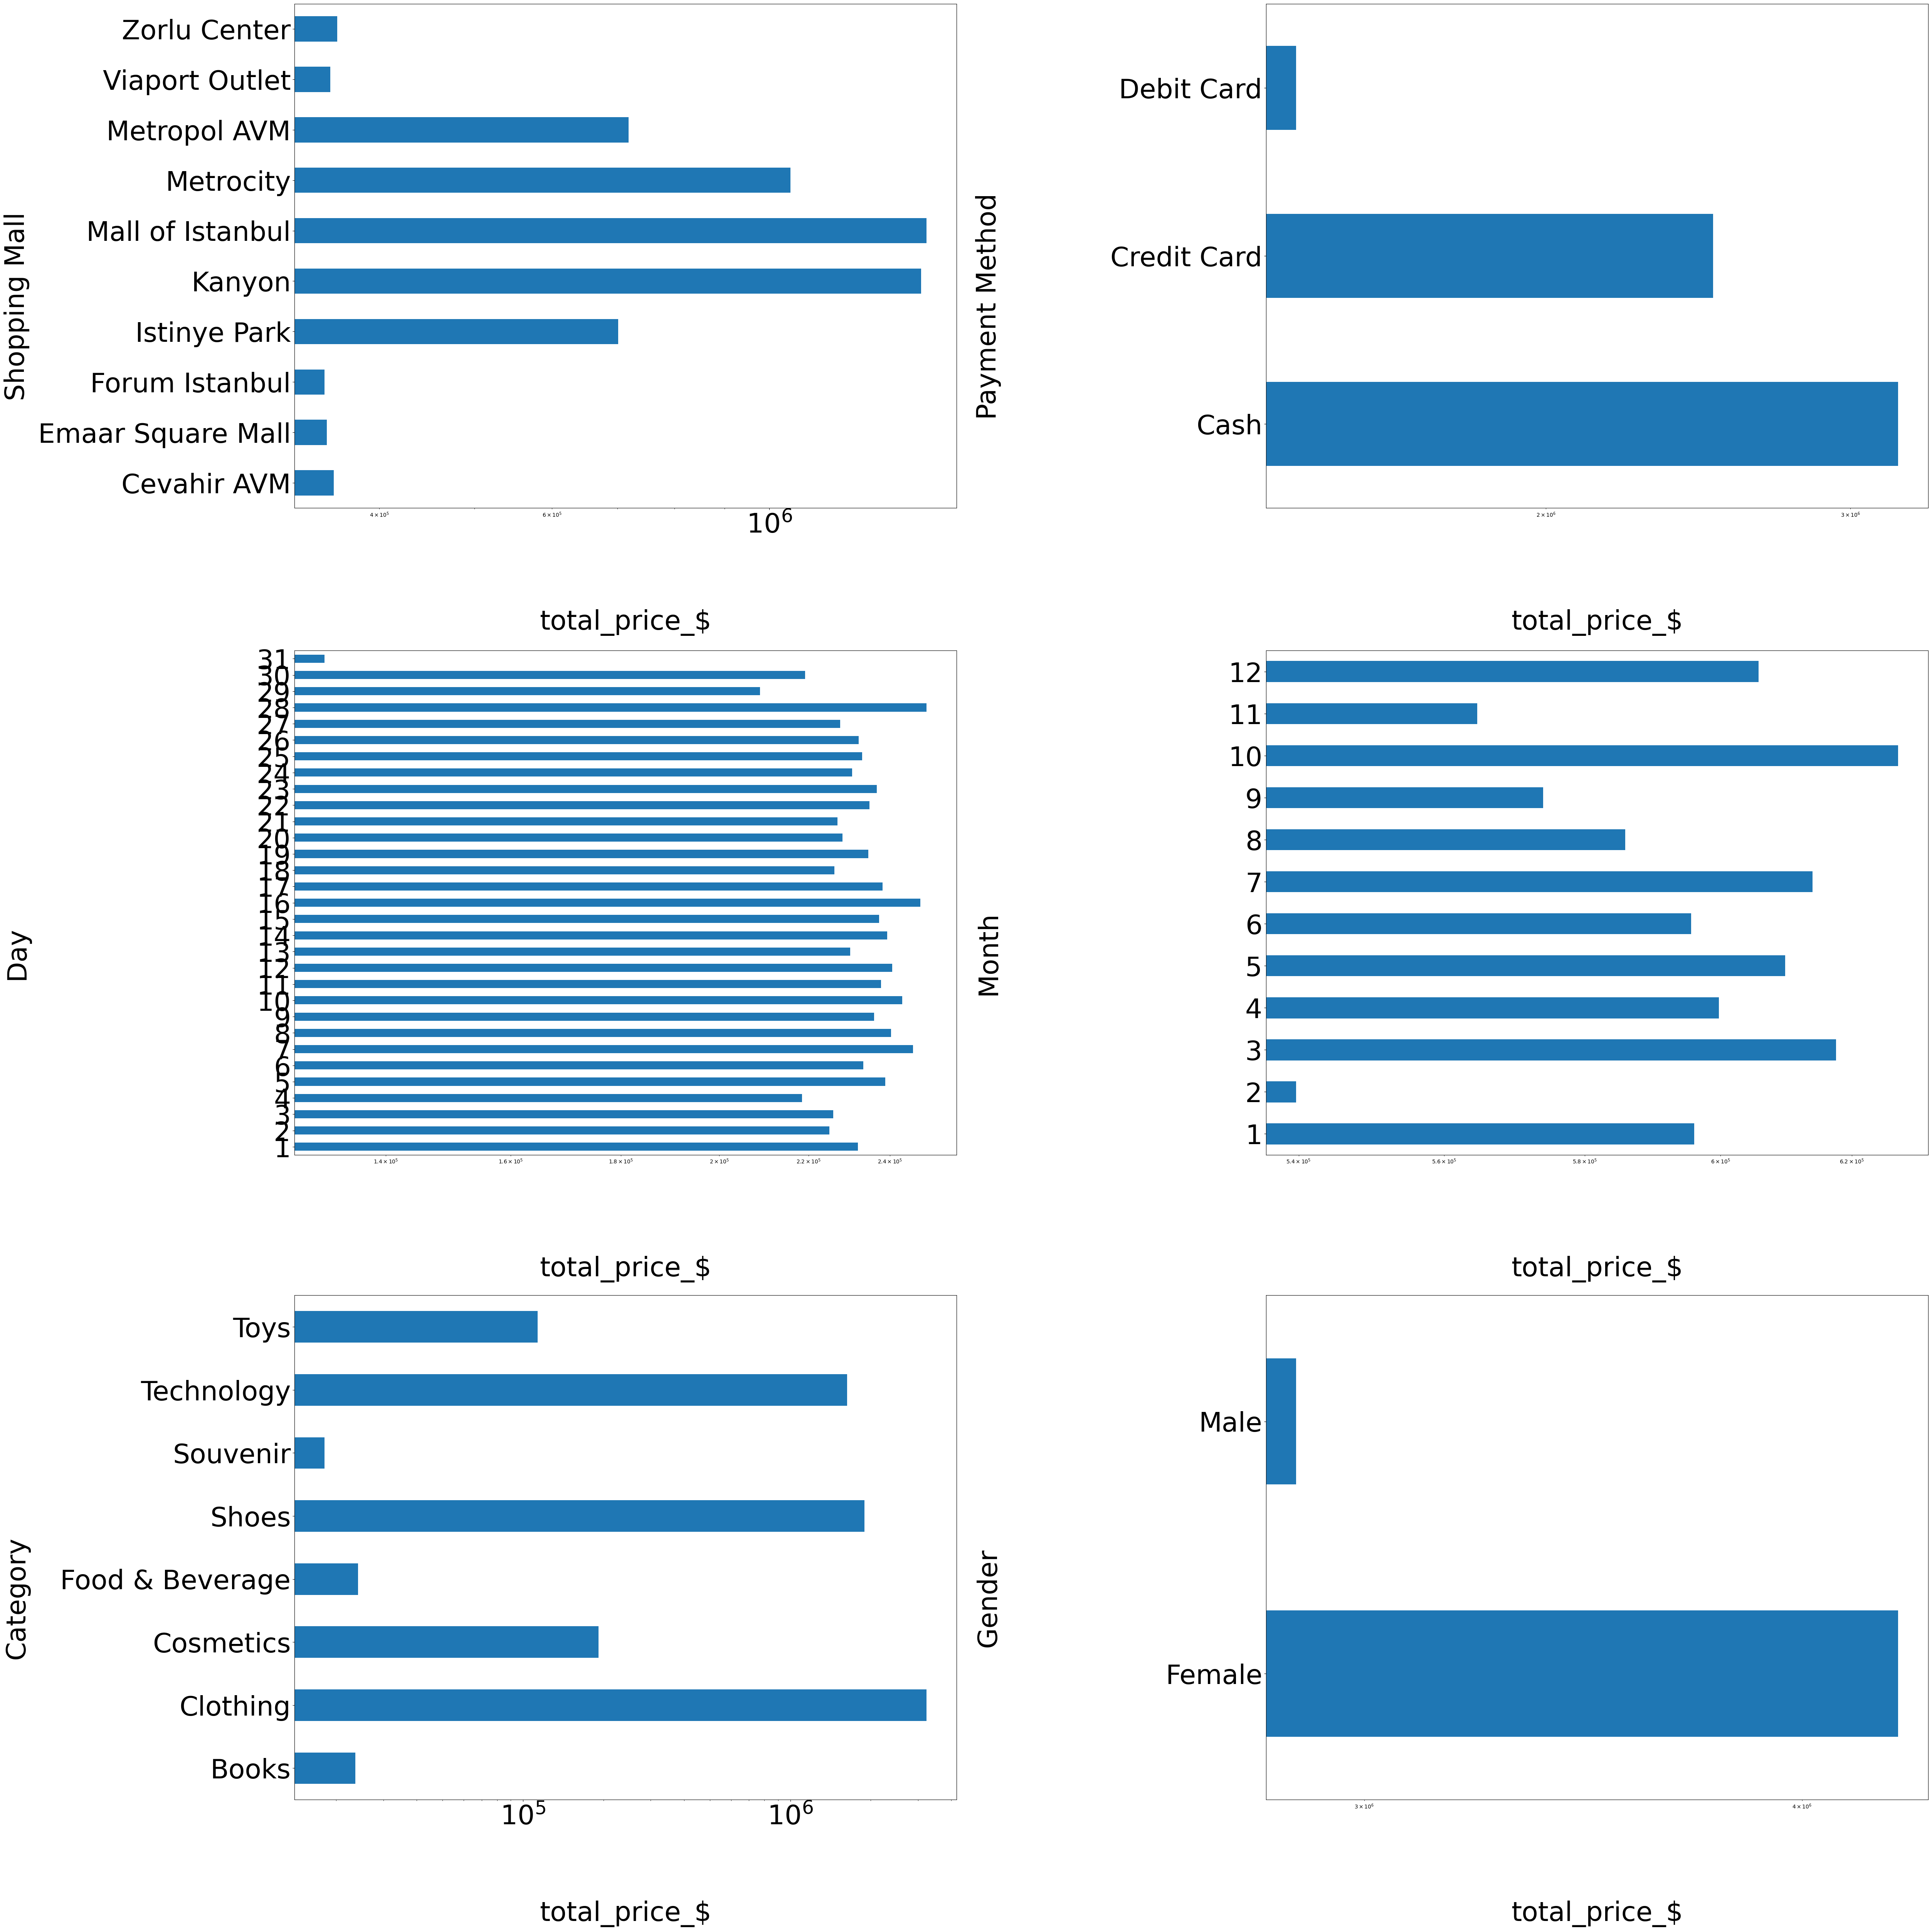

In [37]:
# dataframe sample data
df1 = df.groupby(df['shopping_mall']).agg({'total_price_$': sum})
df2 = df.groupby(df['payment_method']).agg({'total_price_$': sum})
df3 = df.groupby(df['day']).agg({'total_price_$': sum})
df4 = df.groupby(df['month']).agg({'total_price_$': sum})
df5 = df.groupby(df['category']).agg({'total_price_$': sum})
df6 = df.groupby(df['gender']).agg({'total_price_$': sum})

#define number of rows and columns for subplots
nrow=3
ncol=2


# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6]
title_list = ['Shopping Mall','Payment Method','Day','Month', 'Category', 'Gender']
fig, axes = plt.subplots(nrow, ncol,  figsize=(50,50), layout='constrained', sharex=False)

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.barh(ax=axes[r,c])        
        axes[r,c].set_ylabel(title_list[count], fontsize = 50) # Y label
        axes[r,c].yaxis.set_label_coords(-0.4,0.4) # change position for y-axis
        axes[r,c].set_xlabel('total_price_$', fontsize = 50) # X label
        axes[r,c].xaxis.set_label_coords(0.5,-0.2) # change position for x-axis
        axes[r,c].set_xscale('log')               
        axes[r,c].get_legend().remove()
        axes[r,c].tick_params(axis='x', labelsize=50) # change size of values on x-axis
        axes[r,c].tick_params(axis='y', labelsize=50) # change size of values on y-axis
        count+=1


We can see for both years that:
* Mall of Istabul and Kanyon have the highest sales.
* Most people prefer Cash as a payment method.
* The least prefered day to shop is the last day of month (31th) and the most prefered is 16th and 29th. But there are not so many differences in the days that customers shop their product.
* In February the customers do not shop at all. But in July and October we can observe a really good action.
* Females spend much more than males.


## Compare Total Sales for 2022 to 2021

I am going to use sql this time to make our dataframes for plotting.

In [38]:
df_line_plot = pysqldf("""select year, month, sum(total_price_$) as total_price
       from df group by year, month;""")  
df_line_plot.head()

,year,month,total_price
0,2021,1,288645.09
1,2021,2,273254.27
2,2021,3,311834.86
3,2021,4,301629.33
4,2021,5,302786.72


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='month', ylabel='total_price'>

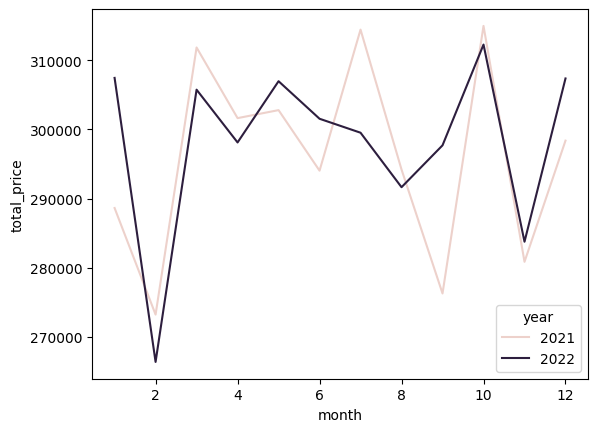

In [39]:
sns.lineplot(x=df_line_plot['month'], y=df_line_plot['total_price'], hue=df_line_plot['year'], 
             data=pd.melt(df_line_plot, ['year']))

## Compare Different Years with Categories

We are going to make a stacked bar to compare our categories in different years.

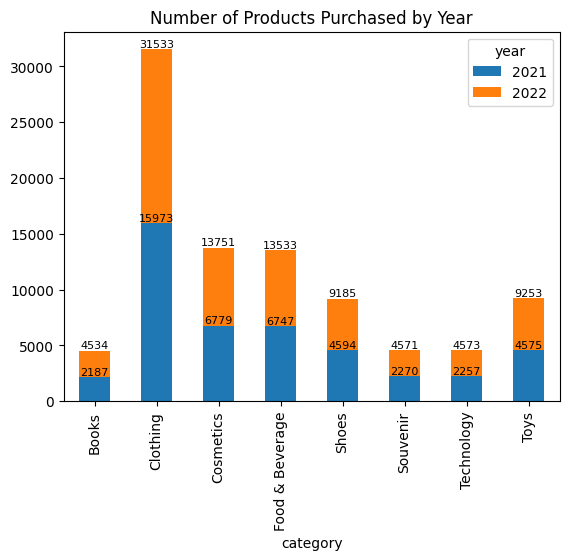

In [40]:
df2_plot_stacked = df.groupby(['category', 'year'])['category'].count().unstack('year').fillna(0)
#stacked bar chart
ax=df2_plot_stacked[[2021, 2022]].plot(kind='bar', stacked=True, title='Number of Products Purchased by Year')
#add annotations
for container in ax.containers:
    ax.bar_label(container, size=8)

We observe that there is no big difference in any category for those years. Seems that customers bought products in a similar way for year 2021 and 2022.

# CONCLUSION
I am stopping now. I have many informations about our mall's sales and the customers behavior in Istabul. I now know that SQL it's much more easier to use than python code. It was fun to use them both. What do you think? I would like to have some feedback please. I also made an interactive dashboard in tableau. If you would like to keep an eye on it I am attaching it below. Thank you for reading until now!

In [41]:
%%HTML
<div class='tableauPlaceholder' id='viz1713267754352' style='position: relative'><noscript><a href='#'><img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sh&#47;ShoppingBehaviorAnalysis_17121279613310&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ShoppingBehaviorAnalysis_17121279613310&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sh&#47;ShoppingBehaviorAnalysis_17121279613310&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1713267754352');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1016px';vizElement.style.height='897px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1016px';vizElement.style.height='897px';} else { vizElement.style.width='100%';vizElement.style.height='3077px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>